<a href="https://colab.research.google.com/github/BishalChhetri/NetworkIntrusionDetection/blob/main/Network_Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds = pd.read_csv('/content/drive/MyDrive/Data/Network_Intrusion_Train_data.csv')
test_ds = pd.read_csv('/content/drive/MyDrive/Data/Network_Intrusion_Test_data.csv')

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_ds.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_ds.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
test_ds.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
train_ds.duplicated().sum()

0

In [ ]:
test_ds.duplicated().sum()

57

In [ ]:
total_rows = train_ds.shape[0]
missing_columns = [col for col in train_ds.columns if train_ds[col].isnull().sum()>0]
for col in missing_columns:
  null_count = train_ds[col].isnull().sum()
  per = (null_count/total_rows) * 100
  print(f"{col}: {null_count} ({round(per,3)}%)")

<Axes: xlabel='class', ylabel='count'>

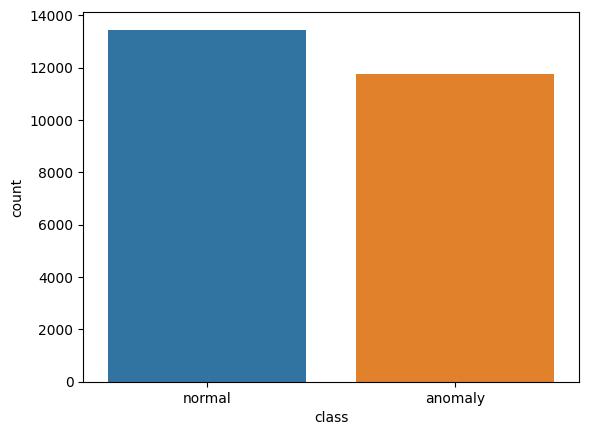

In [ ]:
sns.countplot(x=train_ds['class'])

In [ ]:
print('Class distribution Training set')
print(train_ds['class'].value_counts())

Class distribution Training set
normal     13449
anomaly    11743
Name: class, dtype: int64


In [ ]:
def le(df):
  for col in df.columns:
    if df[col].dtype == "object":
      label_encoder = LabelEncoder()
      df[col] = label_encoder.fit_transform(df[col])

le(train_ds)
le(test_ds)

In [ ]:
train_ds.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_ds.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
train_ds.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
train_X = train_ds.drop(['class'],axis=1)
train_Y = train_ds['class']

In [ ]:
from re import X
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_X,train_Y)

feature_map = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(),train_X.columns)]
selected_features = [v for i,v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [ ]:
train_X = train_X[selected_features]

In [ ]:
scale = StandardScaler()
train_X = scale.fit_transform(train_X)
test = scale.fit_transform(test_ds)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y,train_size=0.70,random_state=2)

In [ ]:
#Logistic Regression

lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train,y_train)

lr_train, lr_test = lr_model.score(X_train, y_train), lr_model.score(X_test,y_test)

print(f"Training Score: {lr_train}")
print(f"Test Score: {lr_test}")

Training Score: 0.9287739593966202
Test Score: 0.9231278115903678


In [ ]:
# pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
  # Define an objective function for hyperparameter optimization using Optuna.
  # This function takes a 'trial' object as an argument to suggest hyperparameter values.
 def objective(trial):

    # Suggest a value for the hyperparameter 'KNN_n_neighbors' within the range [2, 16].
    # The 'log=False' option specifies that the values should be explored linearly.
    n_neighbors = trial.suggest_int('KNN_n_neighbors', low=2, high=16, log=False)

    # Create a K-nearest neighbors (KNN) classifier object with the suggested 'n_neighbors'.
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the KNN classifier on the training data 'X_train' and labels 'y_train'.
    classifier_obj.fit(X_train, y_train)

    # Calculate the accuracy of the trained KNN classifier on the test data 'X_test' and labels 'y_test'.
    accuracy = classifier_obj.score(X_test, y_test)

    # Return the accuracy as the objective value to maximize during optimization.
    return accuracy

# Create an Optuna study with the objective to maximize accuracy.
study_KNN = optuna.create_study(direction='maximize')

# Run the optimization process using the 'objective' function for a single trial.
study_KNN.optimize(objective, n_trials=1)

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(X_train,y_train)

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_test,y_test)

print(f"Training Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Training Score: 0.9831008279460134
Test Score: 0.9813442709711564


In [ ]:
#Decision Tree Classifier

def objective(trial):
  dt_max_depth = trial.suggest_int('dt_max_depth',2,32,log=False)
  dt_max_features = trial.suggest_int('dt_max_features',2,10,log=False)
  classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
  classifier_obj.fit(X_train,y_train)
  accuracy = classifier_obj.score(X_test,y_test)
  return accuracy

study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective,n_trials=30)

In [ ]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(X_train, y_train)

dt_train, dt_test = dt.score(X_train,y_train), dt.score(X_test,y_test)

print(f"Training Score: {dt_train}")
print(f"Test Score: {dt_test}")

Training Score: 1.0
Test Score: 0.9932521831172267


In [ ]:
data = [["KNN", KNN_train, KNN_test],
        ['Logistic Regression', lr_train, lr_test],
        ['Decision Tree',dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.983101 │     0.981344 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928774 │     0.923128 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.993252 │
╘═════════════════════╧═══════════════╧══════════════╛


In [ ]:
# Visualization for different models
SEED = 42

#Decision Tree Model
dtc = DecisionTreeClassifier()

#KNN Model
knn = KNeighborsClassifier()

#Logistic Regression Model
lr = LogisticRegression()

In [ ]:
models = {}
models['KNeighborsClassifier']=knn
models['LogisticRegression']=lr
models['DecisionTreeClassifier']=dtc

In [ ]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name],X_train,y_train,cv=10,scoring=scorer)

In [ ]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name),name,"Model Validation", line(name))

  for scorer in ['precision', 'recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print("Mean {}:".format(scorer),"\n",mean,"%", "+-",stdev)
    print()


*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 98.45 % +- 0.48

Mean recall: 
 98.24 % +- 0.54

**************** LogisticRegression Model Validation ****************
Mean precision: 
 91.35 % +- 0.57

Mean recall: 
 95.72 % +- 0.67

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.52 % +- 0.2

Mean recall: 
 99.5 % +- 0.21



<Axes: >

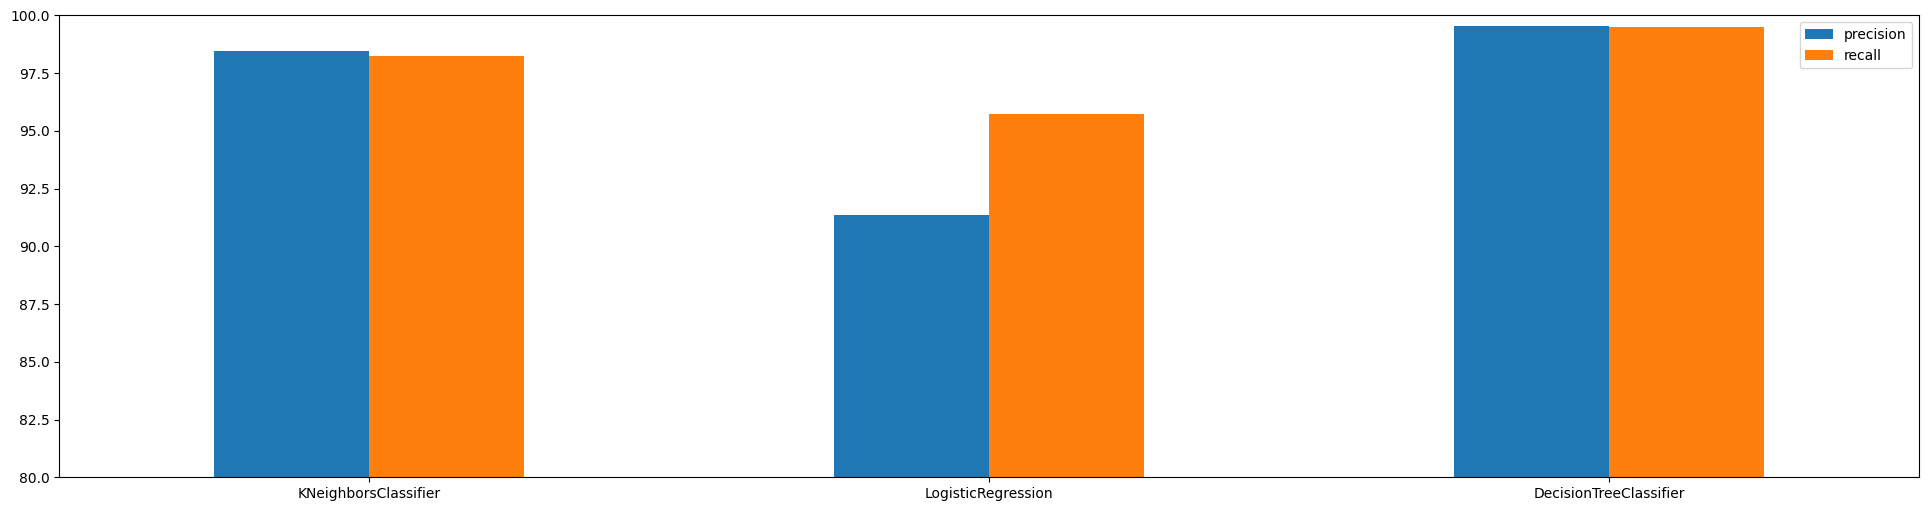

In [ ]:
for name in models:
  for scorer in ['precision','recall']:
    scores[name][scorer] = scores[name][scorer].mean()
scores = pd.DataFrame(scores).swapaxes("index","columns")*100
scores.plot(kind="bar",ylim=[80,100], figsize=(24,6), rot=0)

In [ ]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [ ]:
preds={}
for name in models:
    models[name].fit(X_train, y_train)
    preds[name] = models[name].predict(X_test)
print("Predictions complete.")

Predictions complete.


In [ ]:
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[3435   63]
 [  65 3995]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anamoly       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** LogisticRegression Model Testing ****************
[[3127  371]
 [ 210 3850]]
----------------
              precision    recall  f1-score   support

      normal       0.94      0.89      0.91      3498
     anamoly       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

************** DecisionTreeClassifier Model Testing **************
[[3483   15]
 [  28 4032]]
--------------
              pr

<Axes: >

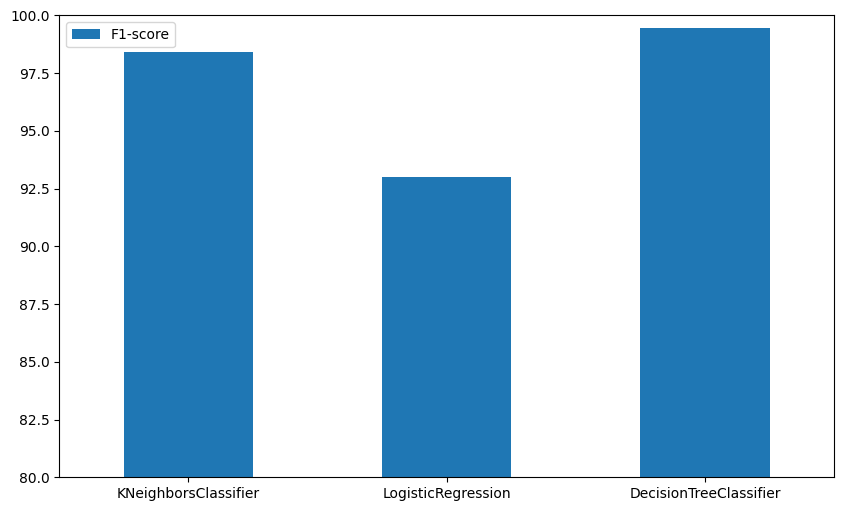

In [ ]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)